# Feature Engineering

References: https://www.analyticsvidhya.com/blog/2021/09/complete-guide-to-feature-engineering-zero-to-hero/

## What is feature engineering?
All machine learning algorithms use some input data to generate outputs. Input data contains many features which may not be in proper form to be given to the model directly. It needs some kind of processing and here feature engineering helps. Feature engineering fulfils mainly two goals:

It prepares the input dataset in the form which is required for a specific model or machine learning algorithm.
Feature engineering helps in improving the performance of machine learning models magically.

The main feature engineering techniques that will be discussed are:

1. Missing data imputation

2. Categorical encoding

3. Variable transformation

4. Outlier engineering

5.  Date and time engineering

### Missing Data Imputation for Feature Engineering
Imputation is the act of replacing missing data with statistical estimates of the missing values. It helps you to complete your training data which can then be provided to any model or an algorithm for prediction.

There are multiple techniques for missing data imputation. These are as follows:-

1. Complete case analysis
2. Mean / Median / Mode imputation
3. Missing Value Indicator

#### Complete Case Analysis for Missing Data Imputation
Complete case analysis is basically analyzing those observations in the dataset that contains values in all the variables. Or you can say, remove all the observations that contain missing values. But this method can only be used when there are only a few observations which has a missing dataset otherwise it will reduce the dataset size and then it will be of not much use.

So, it can be used when missing data is small but in real-life datasets, the amount of missing data is always big. So, practically, complete case analysis is never an option to use, although you can use it if the missing data size is small.

#### Mean/ Median/ Mode for Missing Data Imputation


Missing values can also be replaced with the mean, median, or mode of the variable(feature). It is widely used in data competitions and in almost every situation. It is suitable to use this technique where data is missing at random places and in small proportions.


impute missing values in age in train and test set

median = X_train.Age.median()<br />
for df in [X_train, X_test]:
    df['Age'].fillna(median, inplace=True)<br />
    
X_train['Age'].isnull().sum()

One important point to consider while doing imputation is that it should be done over the training set first and then to the test set. All missing values in the train set and test set should be filled with the value which is extracted from the train set only. This helps in avoiding overfitting.


Explanation:

- **Imputing Missing Values**:

The goal is to handle missing values in the 'Age' column of both the training set (X_train) and the test set (X_test).

- **Choosing Imputation Value**:

The median value of the 'Age' column in the training set (X_train) is calculated and stored in the variable median.

- **Iterating Through DataFrames**:

A loop is used to iterate over both the training set (X_train) and the test set (X_test).

- **Filling Missing Values**:

For each DataFrame (df), the missing values in the 'Age' column are filled with the previously calculated median value using the fillna method. This operation is done in place (inplace=True), meaning the original DataFrames are modified.

- **Checking Missing Values After Imputation**:

X_train['Age'].isnull().sum() is used to check the number of missing values in the 'Age' column of the training set after the imputation.

#### Missing Value Indicator For Missing Value Indication
This technique involves adding a binary variable to indicate whether the value is missing for a certain observation. This variable takes the value 1 if the observation is missing, or 0 otherwise. But we still need to replace the missing values in the original variable, which we tend to do with mean or median imputation. By using these 2 techniques together, if the missing value has predictive power, it will be captured by the missing indicator, and if it doesn’t it will be masked by the mean / median imputation.

X_train['Age_NA'] = np.where(X_train['Age'].isnull(), 1, 0)
<br />
X_test['Age_NA'] = np.where(X_test['Age'].isnull(), 1, 0)
<br />
X_train.head()

X_train.Age.mean(), X_train.Age.median() = (29.915338645418327, 29.0)<br />
Now, since mean and median are the same, let’s replace them with the median.

X_train['Age'].fillna(X_train.Age.median(), inplace=True)
<br />
X_test['Age'].fillna(X_train.Age.median(), inplace=True)

X_train.head(10)
So, the Age_NA variable was created to capture the missingness.

The provided code and explanation describe a technique called "Missing Value Indicator for Missing Value Indication." This technique involves creating a binary indicator variable to explicitly capture whether a particular observation has a missing value. Additionally, it includes imputing the missing values in the original variable using mean or median imputation.

Let's break down the steps:

1. **Create Missing Indicator Variable:**
   ```python
   X_train['Age_NA'] = np.where(X_train['Age'].isnull(), 1, 0)
   X_test['Age_NA'] = np.where(X_test['Age'].isnull(), 1, 0)
   ```
   - This code creates a new binary variable, 'Age_NA,' which takes the value 1 if the corresponding 'Age' value is missing and 0 otherwise. This variable serves as an indicator of missingness.

2. **Impute Missing Values with Median:**
   ```python
   X_train['Age'].fillna(X_train.Age.median(), inplace=True)
   X_test['Age'].fillna(X_train.Age.median(), inplace=True)
   ```
   - The missing values in the 'Age' variable are imputed using the median of the non-missing values in the training set. Both the training and test sets are imputed with the median from the training set.

3. **Reasoning:**
   - The combination of creating a missing indicator and imputing with the median allows for capturing the information about missing values. If the fact that a value is missing has predictive power, it can be captured by the 'Age_NA' variable. Meanwhile, if the missing value itself is not informative, it gets replaced by the median value.

4. **Check the Result:**
   ```python
   X_train.head(10)
   ```
   - This line prints the first 10 rows of the modified training set to show the impact of the missing value indicator and imputation.

5. **Replace with Median when Mean and Median are the Same:**
   ```python
   X_train['Age'].fillna(X_train.Age.median(), inplace=True)
   X_test['Age'].fillna(X_train.Age.median(), inplace=True)
   ```
   - In this specific case where the mean and median of the 'Age' variable are the same, the missing values are replaced with the median.

The key idea is to retain information about missing values using the binary indicator while imputing missing values with a central tendency measure (median in this case). This approach is particularly useful when missingness itself might be predictive or informative in the dataset.

### Categorical encoding in Feature Engineering
Categorical data is defined as that data that takes only a number of values. Let’s understand this with an example. Parameter Gender in a dataset will have categorical values like Male, Female. If a survey is done to know which car people own then the result will be categorical (because the answers would be in categories like Honda, Toyota, Hyundai, Maruti, None, etc.). So, the point to notice here is that data falls in a fixed set of categories.

If you directly give this dataset with categorical variables to a model, you will get an error. Hence, they are required to be encoded. There are multiple techniques to do so:

1. One-Hot encoding (OHE)
2. Ordinal encoding
3. Count and Frequency encoding
4. Target encoding / Mean encoding

#### One-Hot Encoding

It is a commonly used technique for encoding categorical variables. It basically creates binary variables for each category present in the categorical variable. These binary variables will have 0 if it is absent in the category or 1 if it is present. Each new variable is called a dummy variable or binary variable.

Example: using this color approach below:

In [9]:
import pandas as pd

# Create a dummy dataset with a categorical variable 'Color'
data = {'ID': [1, 2, 3, 4, 5],
        'Color': ['Red', 'Green', 'Blue', 'Red', 'Green']}
df = pd.DataFrame(data)

# Display the original dataset
print("Original Dataset:")
print(df)

# Perform one-hot encoding without dropping any variable
encoded_df = pd.get_dummies(df['Color'])
print("\nOne-Hot Encoding without dropping any variable:")
print(encoded_df)

# Concatenate the original 'Color' column with dummy variables
concatenated_df = pd.concat([df['Color'], encoded_df], axis=1)
print("\nConcatenated Dataset:")
print(concatenated_df)

# Perform one-hot encoding with drop_first=True
encoded_df_drop_first = pd.get_dummies(df['Color'], drop_first=True)
print("\nOne-Hot Encoding with drop_first=True:")
print(encoded_df_drop_first)


Original Dataset:
   ID  Color
0   1    Red
1   2  Green
2   3   Blue
3   4    Red
4   5  Green

One-Hot Encoding without dropping any variable:
    Blue  Green    Red
0  False  False   True
1  False   True  False
2   True  False  False
3  False  False   True
4  False   True  False

Concatenated Dataset:
   Color   Blue  Green    Red
0    Red  False  False   True
1  Green  False   True  False
2   Blue   True  False  False
3    Red  False  False   True
4  Green  False   True  False

One-Hot Encoding with drop_first=True:
   Green    Red
0  False   True
1   True  False
2  False  False
3  False   True
4   True  False


**Original Dataset**:

    ID   Color
    1    Red
    2    Green
    3    Blue
    4    Red
    5    Green



**One-Hot Encoding without dropping any variable**:

          Blue  Green  Red
    0     0      0    1
    1     0      1    0
    2     1      0    0
    3     0      0    1
    4     0      1    0


**Concatenated Dataset**:

             Color  Blue  Green  Red
        0    Red     0      0    1
        1  Green     0      1    0
        2   Blue     1      0    0
        3    Red     0      0    1
        4  Green     0      1    0


**One-Hot Encoding with drop_first=True**:

        Green  Red
        0      0    1
        1      1    0
        2      0    0
        3      0    1
        4      1    0

The last output shows one-hot encoding with the drop_first=True argument, resulting in n-1 dummy variables. In this case, 'Blue' is dropped, and 'Green' and 'Red' are represented by a single dummy variable each.

When using one-hot encoding with drop_first=True, one of the categorical levels is dropped to avoid multicollinearity in certain statistical models, such as linear regression. Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated, making it difficult to determine the individual effect of each variable on the response variable.

In the context of one-hot encoding:

If you have a categorical variable with n levels, creating n dummy variables would introduce perfect multicollinearity because knowing the values of n-1 dummy variables would uniquely determine the value of the remaining dummy variable.

By dropping one of the dummy variables, you prevent multicollinearity issues. The dropped variable becomes the reference category, and the information about that category is captured by the other dummy variables.

In the context of one-hot encoding with drop_first=True:
<br />

- If 'Green' is 0 and 'Red' is 0, it implies that both 'Green' and 'Red' are 0, which further implies that the dropped category ('Blue' in this case) is 1.

- If both 'Green' and 'Red' are 0, it means 'Blue' is 1.

The logic is derived from the fact that only one of the dummy variables should be 1 at a time, and the dropped category can be inferred by the absence of the other dummy variables. Let me break down the reasoning:

- Scenario 1 ('Green' is 0 and 'Red' is 0):

    'Green' is 0, indicating that the category 'Green' is not present.
    'Red' is 0, indicating that the category 'Red' is not present.
     Since both 'Green' and 'Red' are 0, it implies that the dropped category (in this case, 'Blue') is 1.
     
- Scenario 2 (both 'Green' and 'Red' are 0):

     Both 'Green' and 'Red' are 0, indicating that neither 'Green' nor 'Red' is present.
     Since both are 0, it implies that the dropped category ('Blue') is 1.

In summary, the values of the dummy variables are such that if the dropped category is not present (both 'Green' and 'Red' are 0), then the dropped category is indicated by the value 1 in the dropped variable.

### Ordinal Encoding
Ordinal encoding is a method of encoding categorical variables where the categories have a meaningful order or ranking. This is commonly used when dealing with variables that have an inherent order or hierarchy among them. For example, grades in an exam (A, B, C, D, Fail) or education levels (High School, Bachelor's, Master's, Ph.D.) are ordinal variables.

Here's an example of how ordinal encoding can be done using Python:

#### Using Manual Mapping with a Dictionary:

In [13]:
import pandas as pd

# Sample data with a categorical variable 'Grade'
data = {'Student': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
        'Grade': ['A', 'B', 'C', 'D', 'Fail']}
df = pd.DataFrame(data)

# Mapping ordinal labels to numerical values
grade_mapping = {'Fail': 0, 'D': 1, 'C': 2, 'B': 3, 'A': 4}

# Applying ordinal encoding to the 'Grade' column
df['Grade_Ordinal'] = df['Grade'].map(grade_mapping)

# Display the DataFrame
print(df)

   Student Grade  Grade_Ordinal
0    Alice     A              4
1      Bob     B              3
2  Charlie     C              2
3    David     D              1
4      Eve  Fail              0


In this example above:

The original DataFrame has two columns, 'Student' and 'Grade.'

A dictionary (grade_mapping) is created to map ordinal labels to numerical values. In this case, 'Fail' is assigned 0, 'D' is assigned 1, and so on.

The map function is used to apply the ordinal encoding to the 'Grade' column, creating a new column called 'Grade_Ordinal.'

The resulting DataFrame would look like this:

       Student Grade  Grade_Ordinal
    0    Alice     A              4
    1      Bob     B              3
    2  Charlie     C              2
    3    David     D              1
    4      Eve  Fail              0
    
    
Now, the 'Grade_Ordinal' column represents the ordinal encoding of the original 'Grade' column, where higher values indicate higher grades. This encoding retains the ordinal relationship among the categories.

#### Using LabelEncoder:

In [22]:
from sklearn import preprocessing

# Sample data with a categorical variable 'Size'
sizes = ['Medium', 'Small', 'Large', 'Medium', 'Large', 'Small']

# Create a LabelEncoder
size_encoder = preprocessing.LabelEncoder()

# Fit the LabelEncoder on the list of categories
size_encoder.fit(sizes)

# Transform labels to encoded values
encoded_sizes = size_encoder.transform(sizes)

# Display the results
print("Original Sizes:", sizes)
print("Encoded Sizes:", encoded_sizes)

# Inverse transform to get original labels back
decoded_sizes = size_encoder.inverse_transform(encoded_sizes)
print("Decoded Sizes:", decoded_sizes)

Original Sizes: ['Medium', 'Small', 'Large', 'Medium', 'Large', 'Small']
Encoded Sizes: [1 2 0 1 0 2]
Decoded Sizes: ['Medium' 'Small' 'Large' 'Medium' 'Large' 'Small']


**Pros and Cons**:

- LabelEncoder:

    Pros:
    - Compact and convenient for simple cases.
    - No need to create a separate mapping dictionary manually.

    Cons:
    - May not be as transparent if you want to inspect or modify the mapping.
    - Less control over the encoding if you need a custom mapping.
    <br />
    <br />
    
- Manual Mapping with a Dictionary:

    Pros:
    - Explicit control over the mapping.
    - Clear visibility of the mapping.
    <br />
    
    Cons:
    - Requires manual creation and maintenance of the mapping dictionary.
    - More verbose for large datasets or many categories.

In practice, the choice between these methods depends on the complexity of your encoding needs and personal coding preferences. The ``LabelEncoder`` is convenient and concise, while manual mapping provides more explicit control. For simple ordinal encoding tasks, either method is acceptable.

### Count and Frequency Encoding

#### Count Encoding
In count encoding, each category is replaced with the count of occurrences of that category in the dataset. This can be a useful encoding technique when the frequency or prevalence of each category is important information for the model.

In [23]:
import pandas as pd

# Sample data with a categorical variable 'Color'
data = {'ID': [1, 2, 3, 4, 5, 6, 7],
        'Color': ['Red', 'Blue', 'Green', 'Red', 'Green', 'Blue', 'Red']}
df = pd.DataFrame(data)

# Perform count encoding
count_encoding = df['Color'].value_counts().to_dict()

# Map the counts back to the original DataFrame
df['Color_Count'] = df['Color'].map(count_encoding)

# Display the DataFrame
print(df)

   ID  Color  Color_Count
0   1    Red            3
1   2   Blue            2
2   3  Green            2
3   4    Red            3
4   5  Green            2
5   6   Blue            2
6   7    Red            3


#### Frequency Encoding:

Frequency encoding is similar to count encoding, but instead of using the count, it uses the frequency or proportion of each category in the dataset. This can be particularly useful when the relative prevalence of categories is more important than their absolute counts.

In [24]:
import pandas as pd

# Sample data with a categorical variable 'Color'
data = {'ID': [1, 2, 3, 4, 5, 6, 7],
        'Color': ['Red', 'Blue', 'Green', 'Red', 'Green', 'Blue', 'Red']}
df = pd.DataFrame(data)

# Perform frequency encoding
frequency_encoding = (df['Color'].value_counts() / len(df)).to_dict()

# Map the frequencies back to the original DataFrame
df['Color_Frequency'] = df['Color'].map(frequency_encoding)

# Display the DataFrame
print(df)

   ID  Color  Color_Frequency
0   1    Red         0.428571
1   2   Blue         0.285714
2   3  Green         0.285714
3   4    Red         0.428571
4   5  Green         0.285714
5   6   Blue         0.285714
6   7    Red         0.428571


### Target / Mean Encoding
Target encoding, also known as mean encoding or likelihood encoding, is a technique used in machine learning for encoding categorical variables based on the mean (or some other aggregation) of the target variable within each category. This is particularly useful when dealing with categorical features in a supervised learning context.

Here's how target encoding works:

- Calculate the mean of the target variable for each category in the categorical feature.
- Replace the categorical values with their corresponding means.

In [25]:
import pandas as pd

# Sample data with a categorical variable 'Category' and a target variable 'Target'
data = {'ID': [1, 2, 3, 4, 5, 6, 7],
        'Category': ['A', 'B', 'A', 'B', 'A', 'B', 'A'],
        'Target': [0, 1, 1, 0, 1, 1, 0]}
df = pd.DataFrame(data)

# Calculate mean of 'Target' for each 'Category'
mean_encoding = df.groupby('Category')['Target'].mean().to_dict()

# Map the means back to the original DataFrame
df['Category_Mean_Encoding'] = df['Category'].map(mean_encoding)

# Display the DataFrame
print(df)

   ID Category  Target  Category_Mean_Encoding
0   1        A       0                0.500000
1   2        B       1                0.666667
2   3        A       1                0.500000
3   4        B       0                0.666667
4   5        A       1                0.500000
5   6        B       1                0.666667
6   7        A       0                0.500000


In this example, the 'Category_Mean_Encoding' column is created based on the mean of the 'Target' variable for each category in the 'Category' column.

Note:

- Target encoding can be sensitive to overfitting, especially if the number of samples in a category is small.
- Techniques like smoothing or regularization are often applied to avoid overfitting, especially when dealing with high-cardinality categorical features.

Target encoding can be effective when there is a clear relationship between the categorical variable and the target variable, and it is commonly used in Kaggle competitions and other data science projects. However, it should be used judiciously and validated to avoid overfitting.

### Variable Transformation
Machine learning algorithms like linear and logistic regression assume that the variables are normally distributed. If a variable is not normally distributed, sometimes it is possible to find a mathematical transformation so that the transformed variable is Gaussian. Gaussian distributed variables many times boost the machine learning algorithm performance.

Commonly used mathematical transformations are:

- Logarithm transformation – log(x)
- Square root transformation – sqrt(x)
- Reciprocal transformation – 1 / x
- Exponential transformation – exp(x)

In [54]:
import pandas as pd
from scipy import stats
from matplotlib import pylab, pyplot as plt

titanic_train_data = pd.read_csv('./datasets/titanic/train.csv')
titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
def impute(data, variable):
    df = data.copy()
    df[variable+'_random'] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    return df[variable+'_random']

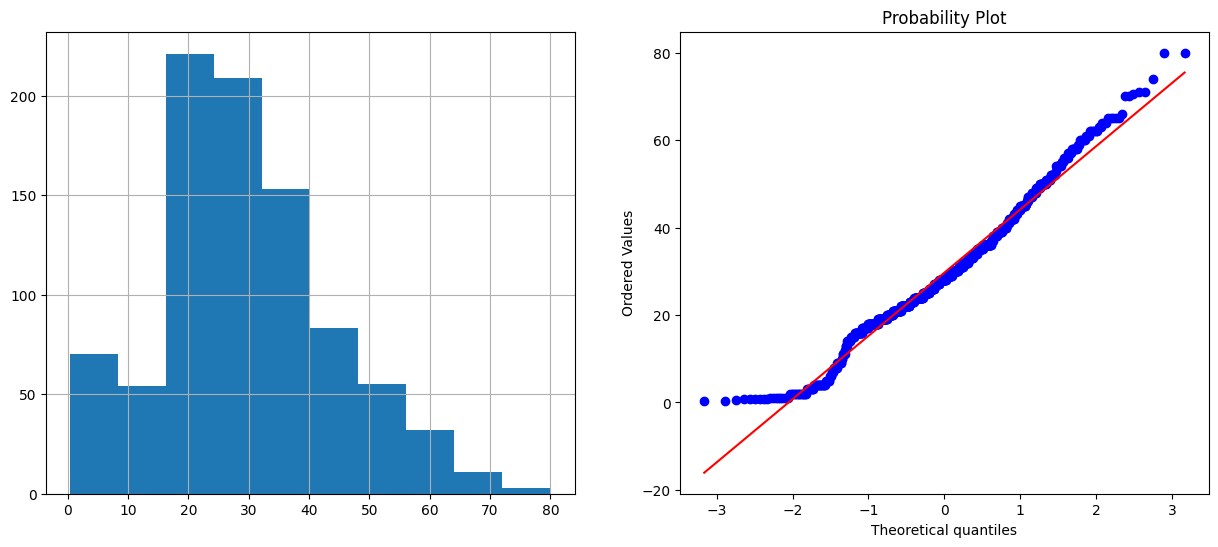

In [82]:
def plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)
    plt.show()

titanic_train_data['Age'] = impute(titanic_train_data, 'Age')
plots(titanic_train_data, 'Age')

### Logarithmic transformation

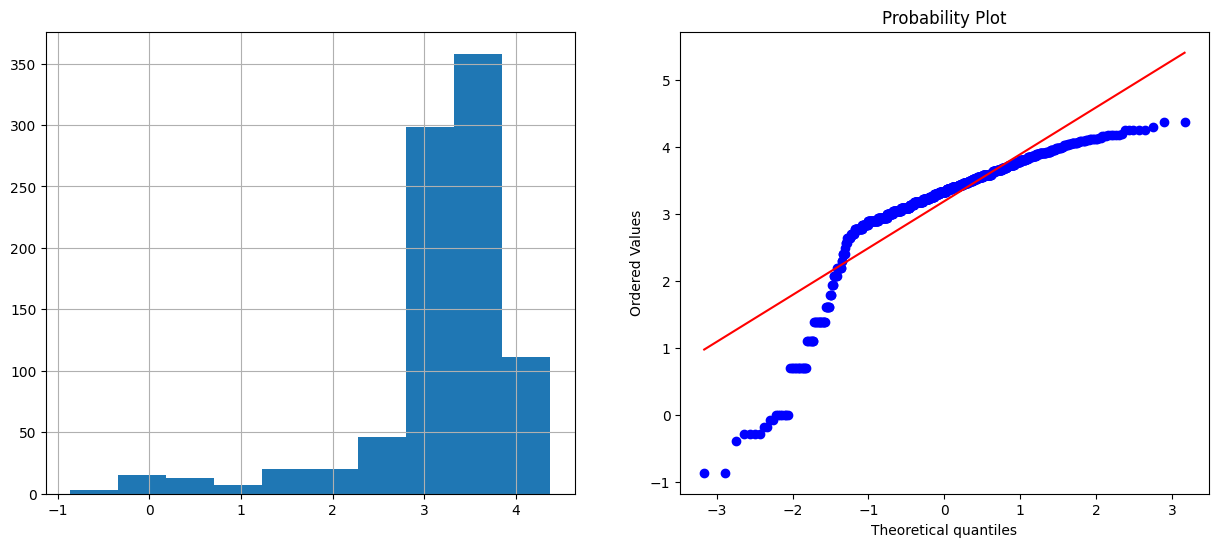

In [83]:
# Creating 'Age_log' variable
titanic_train_data['Age_log'] = np.log(titanic_train_data['Age'])
plots(titanic_train_data, 'Age_log')

We can observe here that logarithmic transformation did not produce a Gaussian-like distribution for Age column.

### Square root transformation – sqrt(x)

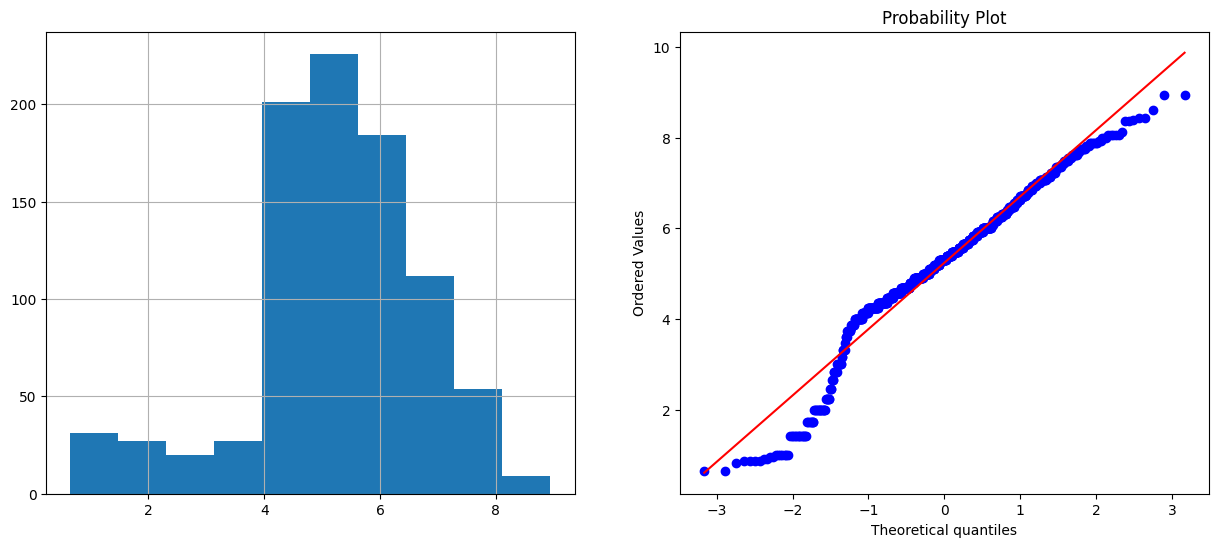

In [84]:
titanic_train_data['Age_sqr'] = titanic_train_data.Age**(1/2)
plots(titanic_train_data, 'Age_sqr')

This is a bit better, but the still variable is not Gaussian.

### Reciprocal transformation – 1 / x

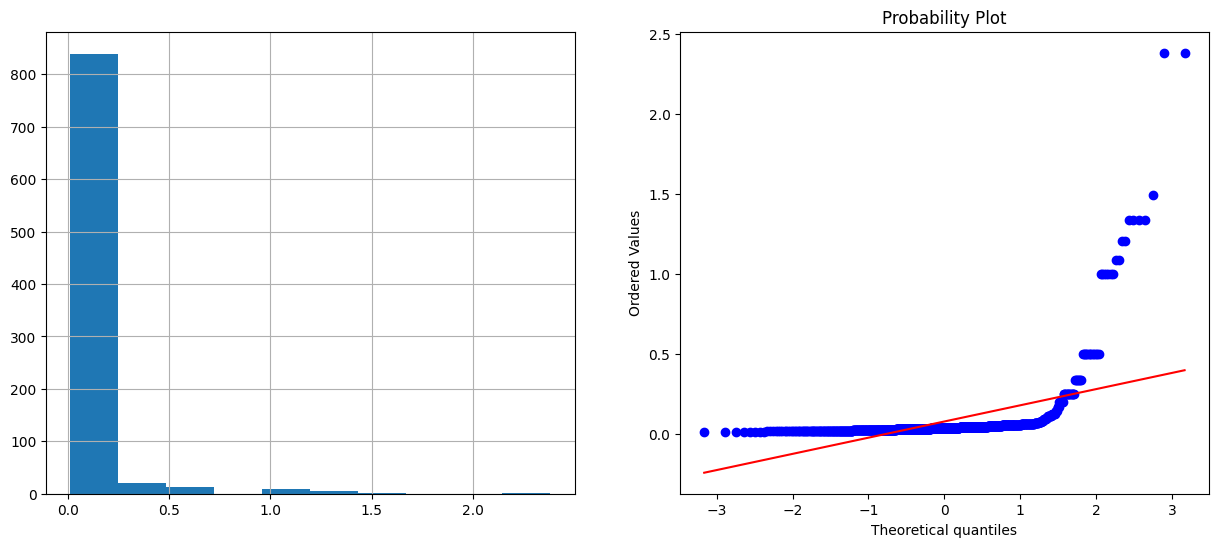

In [88]:
titanic_train_data['Age_reciprocal'] = 1 / (titanic_train_data.Age)
plots(titanic_train_data, 'Age_reciprocal')

This transformation is also not useful to transform Age into a  normally distributed variable.

### Exponential transformation – exp(x)

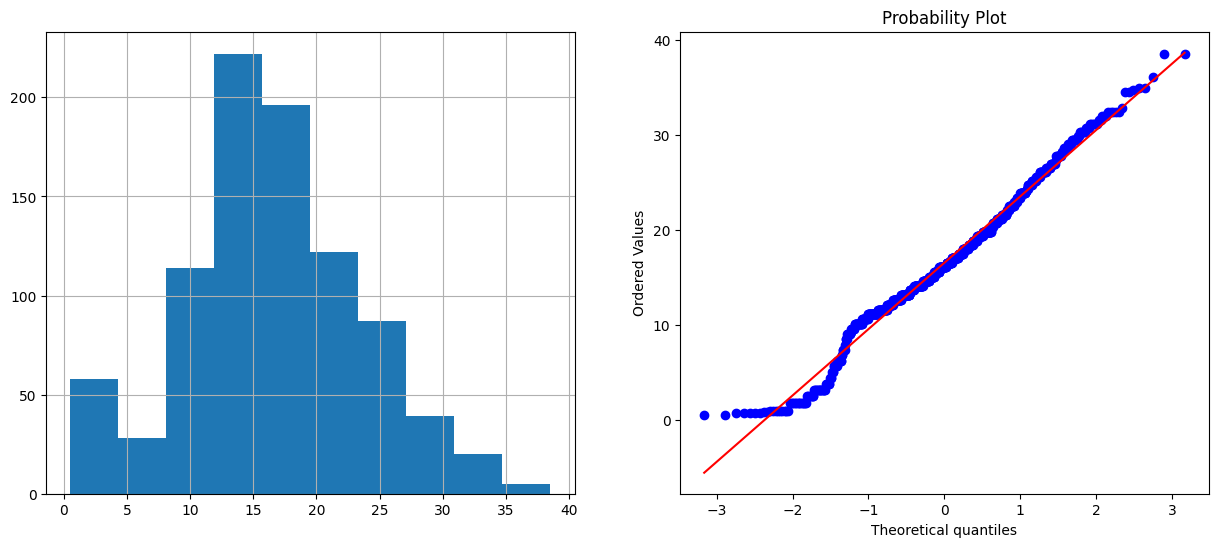

In [89]:
titanic_train_data['Age_exp'] = titanic_train_data.Age**(1/1.2) 
plots(titanic_train_data, 'Age_exp')

This one is the best of all the transformations above, at the time of generating a variable that is normally distributed.

## Outlier engineering
Outliers are defined as those values that are unusually high or low with respect to the rest of the observations of the variable. Some of the techniques to handle outliers are:

1. Outlier removal

2. Treating outliers as missing values

3. Outlier capping

**How to identify outliers?**

For that, the basic form of detection is an extreme value analysis of data. If the distribution of the variable is Gaussian then outliers will lie outside the mean plus or minus three times the standard deviation of the variable. But if the variable is not normally distributed, then quantiles can be used. Calculate the quantiles and then inter quartile range:

- Inter quantile is 75th quantile - 25quantile.

- upper boundary: 75th quantile + (IQR * 1.5)

- lower boundary: 25th quantile – (IQR * 1.5)

So, the outlier will sit outside these boundaries.

**Outlier removal**
In this technique, simply remove outlier observations from the dataset. In datasets if outliers are not abundant, then dropping the outliers will not affect the data much. But if multiple variables have outliers then we may end up removing a big chunk of data from our dataset. So, this point has to be kept in mind whenever dropping the outliers.

**Treating outliers as missing values**
You can also treat outliers as missing values. But then these missing values also have to be filled. So to fill missing values you can use any of the methods as discussed above in this article.

**Outlier capping**
This procedure involves capping the maximum and minimum values at a predefined value. This value can be derived from the variable distribution. If a variable is normally distributed we can cap the maximum and minimum values at the mean plus or minus three times the standard deviation. But if the variable is skewed, we can use the inter-quantile range proximity rule or cap at the bottom percentiles.